In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [9]:
df = pd.read_excel("QWE/QWE.xlsx")

In [6]:
X = df.drop(['Churn','ID'], axis=1) 
X.columns

Index(['Customer_Age_inmonths', 'CHI_M0', 'CHI_M01', 'Support_M0',
       'Support_M01', 'SP_M0', 'SP_M01', 'Logins_M01', 'Blog_M01', 'Views_M01',
       'DaysLastLogin_M01'],
      dtype='object')

In [60]:
df['Age_Group'] = pd.cut(df['Customer_Age_inmonths'], bins=[0, 6, 14, float('inf')], labels=['Group 1', 'Group 2', 'Group 3'])
x = pd.get_dummies(df['Age_Group'])
x

,Group 1,Group 2,Group 3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
6342,1,0,0
6343,1,0,0
6344,1,0,0
6345,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     6347 non-null   int64  
 1   Customer_Age_inmonths  6347 non-null   int64  
 2   Churn                  6347 non-null   int64  
 3   CHI_M0                 6347 non-null   int64  
 4   CHI_M01                6347 non-null   int64  
 5   Support_M0             6347 non-null   int64  
 6   Support_M01            6347 non-null   int64  
 7   SP_M0                  6347 non-null   float64
 8   SP_M01                 6347 non-null   float64
 9   Logins_M01             6347 non-null   int64  
 10  Blog_M01               6347 non-null   int64  
 11  Views_M01              6347 non-null   int64  
 12  DaysLastLogin_M01      6347 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 644.7 KB


no null values found in the dataset

In [16]:
print(df.duplicated().sum())
df.isnull().sum()

0


ID                       0
Customer_Age_inmonths    0
Churn                    0
CHI_M0                   0
CHI_M01                  0
Support_M0               0
Support_M01              0
SP_M0                    0
SP_M01                   0
Logins_M01               0
Blog_M01                 0
Views_M01                0
DaysLastLogin_M01        0
dtype: int64

In [21]:
df = df.drop("ID", axis=1)
df

,Customer_Age_inmonths,Churn,CHI_M0,CHI_M01,Support_M0,Support_M01,SP_M0,SP_M01,Logins_M01,Blog_M01,Views_M01,DaysLastLogin_M01
0,67,0,0,0,0,0,0.0,0.0,0,0,0,31
1,67,0,62,4,0,0,0.0,0.0,0,0,-16,31
2,55,0,0,0,0,0,0.0,0.0,0,0,0,31
3,63,0,231,1,1,-1,3.0,0.0,167,-8,21996,0
4,57,0,43,-1,0,0,0.0,0.0,0,0,9,31
...,...,...,...,...,...,...,...,...,...,...,...,...
6342,1,0,0,0,0,0,0.0,0.0,0,0,0,0
6343,1,0,0,0,0,0,0.0,0.0,0,0,0,0
6344,1,0,0,0,0,0,0.0,0.0,0,0,0,0
6345,1,0,0,0,0,0,0.0,0.0,0,0,0,0


In [22]:
df.describe()

,Customer_Age_inmonths,Churn,CHI_M0,CHI_M01,Support_M0,Support_M01,SP_M0,SP_M01,Logins_M01,Blog_M01,Views_M01,DaysLastLogin_M01
count,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,13.896802,0.050890,87.316685,5.058610,0.706318,-0.006932,0.812781,0.030169,15.727903,0.157240,96.310540,1.764613
std,11.160078,0.219791,66.282788,30.828767,1.723961,1.870942,1.320530,1.460336,42.119061,4.660607,3152.411673,17.966020
min,0.000000,0.000000,0.000000,-125.000000,0.000000,-29.000000,0.000000,-4.000000,-293.000000,-75.000000,-28322.000000,-648.000000
25%,5.000000,0.000000,24.500000,-8.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-11.000000,0.000000
50%,11.000000,0.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,20.000000,0.000000,139.000000,15.000000,1.000000,0.000000,2.666667,0.000000,23.000000,0.000000,27.000000,3.000000
max,67.000000,1.000000,298.000000,208.000000,32.000000,31.000000,4.000000,4.000000,865.000000,217.000000,230414.000000,61.000000


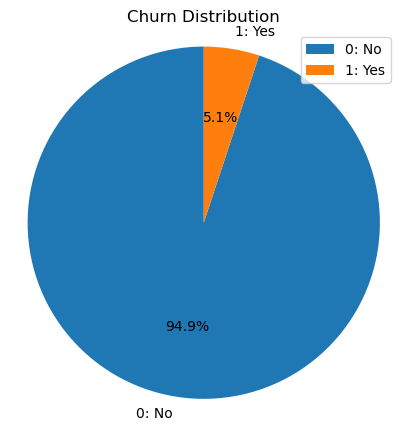

In [12]:
churn_vector = df['Churn'].value_counts()
churn_vector
# 绘制饼状图
plt.figure(figsize=(5, 5))
plt.pie(churn_vector, labels=['0: No', '1: Yes'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 保持饼状图的纵横比相等
plt.title('Churn Distribution')
legend_labels = ['0: No', '1: Yes']
plt.legend(labels=legend_labels)
plt.show()

Churn is the target variable and represents whether the customer churned(churn=1) or not(churn=0)
Since the mean of Churn is 0.05, the target dataset is imbalanced.

# 客户流失分析

“Wall说：‘关于年限，我认为如果一个客户已经和我们合作超过14个月，他（她）就很清楚如何使用我们的服务，并从服务中得到价值，这样就不太可能终止合同。那些和我们合作不到半年的客户，可能刚刚了解到我们的服务，比较难预判未来的走向。那些合作6到14个月之间的客户则是最有可能解除合约的。 ”

In [22]:
age_gro_count = df.groupby(pd.cut(df['Customer_Age_inmonths'], bins=[0, 6, 14,max(df['Customer_Age_inmonths'])]))['Churn'].count()
age_gro_sum = df.groupby(pd.cut(df['Customer_Age_inmonths'], bins=[0, 6, 14,max(df['Customer_Age_inmonths'])]))['Churn'].sum()
age_gro_mean = df.groupby(pd.cut(df['Customer_Age_inmonths'], bins=[0, 6, 14,max(df['Customer_Age_inmonths'])]))['Churn'].mean()
print(age_gro_count)
print(age_gro_sum)
print(age_gro_mean)


Customer_Age_inmonths
(0, 6]      2050
(6, 14]     1902
(14, 67]    2394
Name: Churn, dtype: int64
Customer_Age_inmonths
(0, 6]       44
(6, 14]     147
(14, 67]    132
Name: Churn, dtype: int64
Customer_Age_inmonths
(0, 6]      0.021463
(6, 14]     0.077287
(14, 67]    0.055138
Name: Churn, dtype: float64


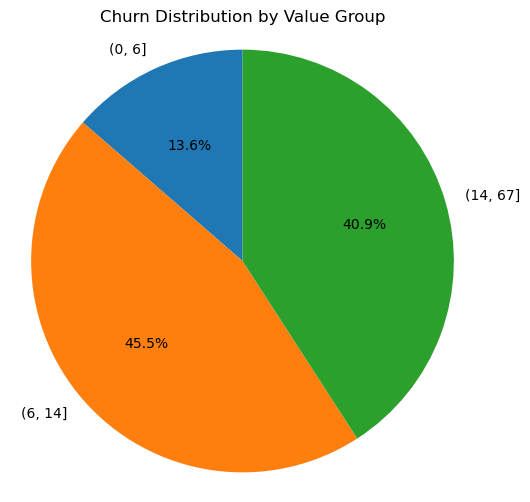

In [23]:
plt.figure(figsize=(6, 6))
plt.pie(age_gro_sum, labels=age_gro_sum.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 保持饼状图的纵横比相等
plt.title('Churn Distribution by Value Group')
plt.show()

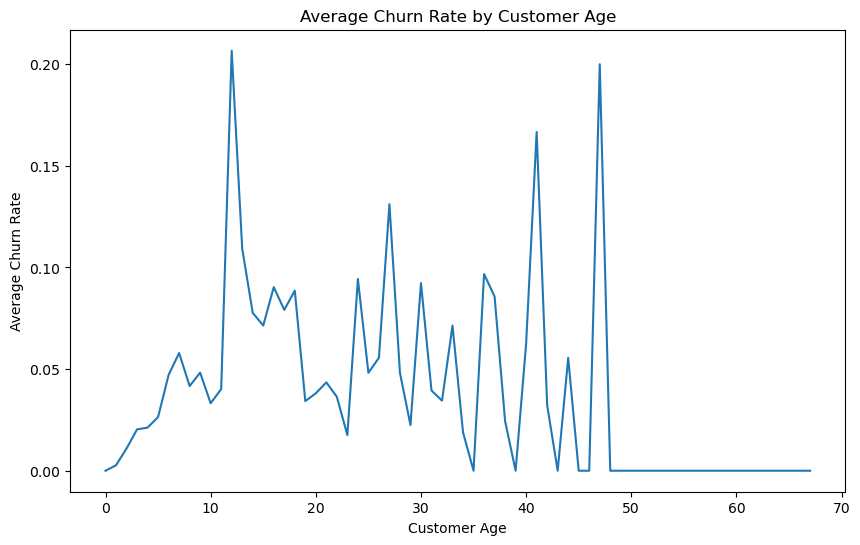

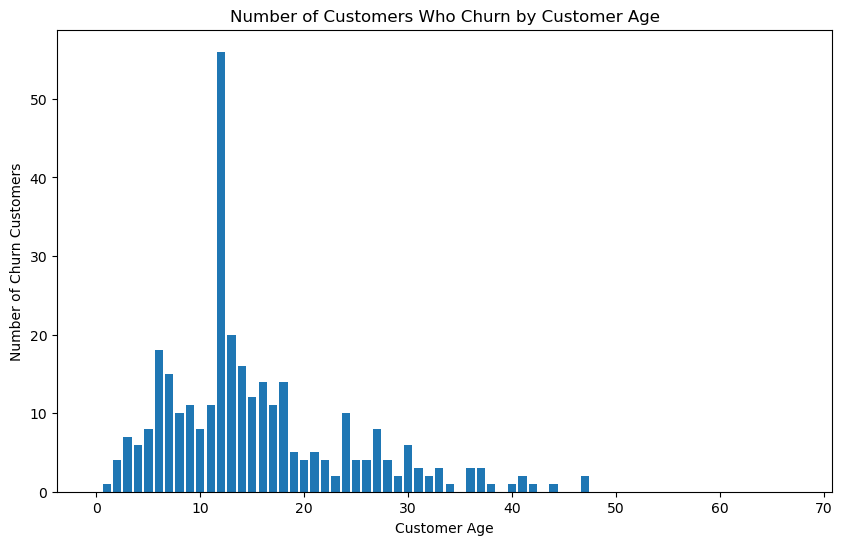

In [24]:
# 计算按客户年龄分组的平均流失率
avg_churn_rate = df.groupby("Customer_Age_inmonths")["Churn"].mean()

# 绘制 Average churn rate by customer age 图像
plt.figure(figsize=(10, 6))
plt.plot(avg_churn_rate.index, avg_churn_rate.values)
plt.xlabel("Customer Age")
plt.ylabel("Average Churn Rate")
plt.title("Average Churn Rate by Customer Age")
plt.show()

# 计算按客户年龄分组的流失客户数量
num_churn_customers = df.groupby("Customer_Age_inmonths")["Churn"].sum()

# 绘制 Number of customers who churn by customer age 图像
plt.figure(figsize=(10, 6))
plt.bar(num_churn_customers.index, num_churn_customers.values)
plt.xlabel("Customer Age")
plt.ylabel("Number of Churn Customers")
plt.title("Number of Customers Who Churn by Customer Age")
plt.show()

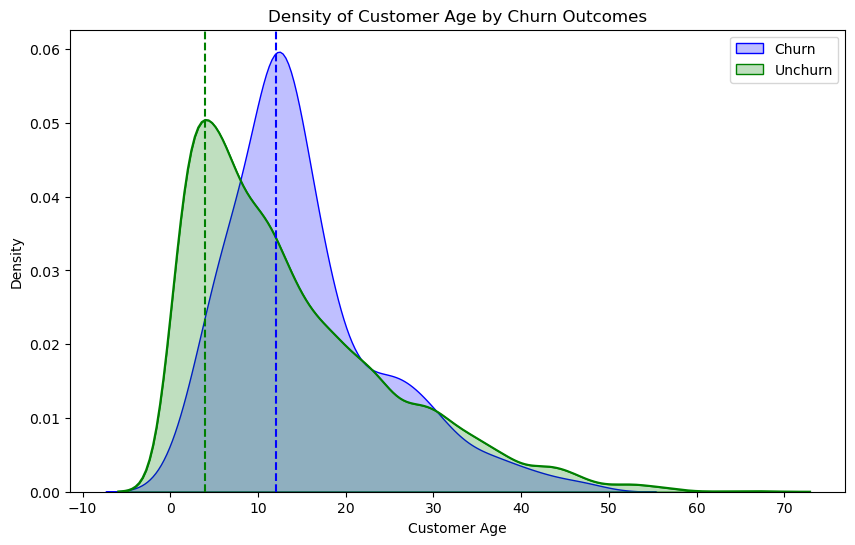

In [50]:
# 拆分为 churn 和未 churn 的子集
churn_data = df[df["Churn"] == 1]
unchurn_data = df[df["Churn"] == 0]

# 绘制 Density of Customer Age by churn outcomes 图像
plt.figure(figsize=(10, 6))
sns.kdeplot(data=churn_data["Customer_Age_inmonths"], color="blue", fill=True, label="Churn")
sns.kdeplot(data=unchurn_data["Customer_Age_inmonths"], color="green", fill=True, label="Unchurn")

# 计算绿色峰值处的位置和概率密度
green_density = sns.kdeplot(data=unchurn_data["Customer_Age_inmonths"], color="green").get_lines()[0].get_data()
green_x_peak = green_density[0][np.argmax(green_density[1])]
green_peak_density = np.max(green_density[1])

# 计算峰值处的 x 坐标和具体值
churn_peak_x = churn_data["Customer_Age_inmonths"].mode()[0]
churn_peak_value = churn_data["Customer_Age_inmonths"].value_counts().max()

# 绘制峰值处的辅助线和文本
plt.axvline(x=churn_peak_x, color="blue", linestyle="--")

# 绘制绿色峰值处辅助线和标注
plt.axvline(x=green_x_peak, color="green", linestyle="--")


plt.xlabel("Customer Age")
plt.ylabel("Density")
plt.title("Density of Customer Age by Churn Outcomes")

plt.legend()
plt.show()

In [6]:
cross_table = pd.crosstab(df['Customer_Age_inmonths'], df['Churn'])
# 进行卡方检验
chi2, p_value, dof, expected = chi2_contingency(cross_table)

# 打印卡方统计量和p值
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 258.61146540773785
p-value: 1.748571426113347e-26


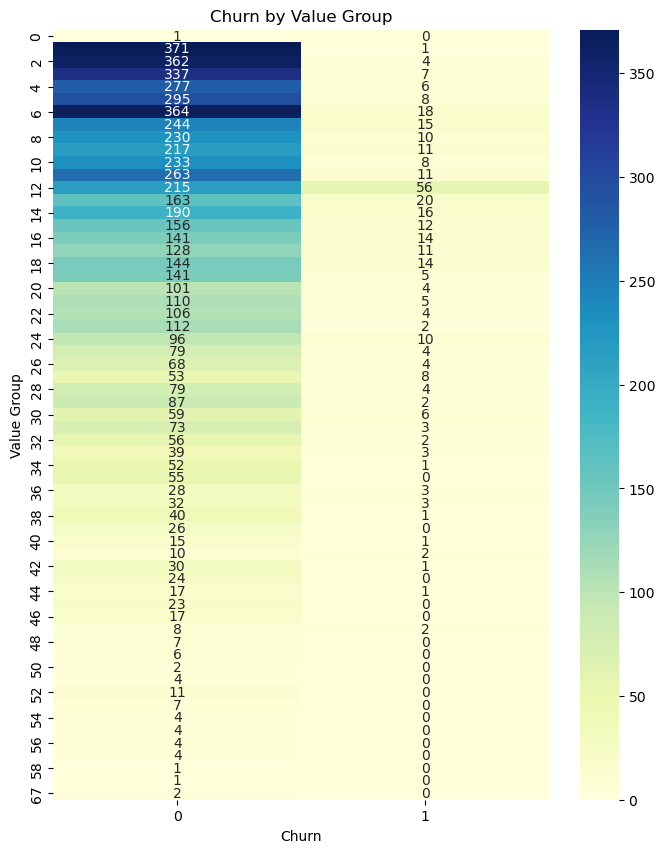

In [8]:
# plot heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(cross_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Churn by Value Group')
plt.xlabel('Churn')
plt.ylabel('Value Group')
plt.show()

In [16]:
from scipy.stats import pearsonr

#检验系数相关性与p值

# 获取目标数据和每一列数据
target = df['Churn']
columns = df.columns.drop(labels=['ID','Churn'])

# 逐列进行相关性检验
for col in columns:
    data = df[col]
    
    # 计算相关系数和p值
    correlation, p_value = pearsonr(data, target)
    
    # 打印结果
    print(f"Column: {col}")
    print("Correlation:", correlation)
    print("p-value:", p_value)
    print("")

Column: Customer_Age_inmonths
Correlation: 0.03021542900142255
p-value: 0.01607183685632572

Column: CHI_M0
Correlation: -0.08400463799137786
p-value: 2.0415759038169522e-11

Column: CHI_M01
Correlation: -0.06606858753363493
p-value: 1.3771090179155546e-07

Column: Support_M0
Correlation: -0.04497303376255699
p-value: 0.0003383435049938959

Column: Support_M01
Correlation: 0.0054565070641110144
p-value: 0.6638332271593358

Column: SP_M0
Correlation: -0.054928644682226795
p-value: 1.1949766323468797e-05

Column: SP_M01
Correlation: -0.007431734285206818
p-value: 0.5538750827887192

Column: Logins_M01
Correlation: -0.042148506588891105
p-value: 0.0007830410443907109

Column: Blog_M01
Correlation: -0.012889377642988946
p-value: 0.3045560400569168

Column: Views_M01
Correlation: -0.014110047207532492
p-value: 0.26103226718503786

Column: DaysLastLogin_M01
Correlation: 0.06085790091845087
p-value: 1.222389612391723e-06



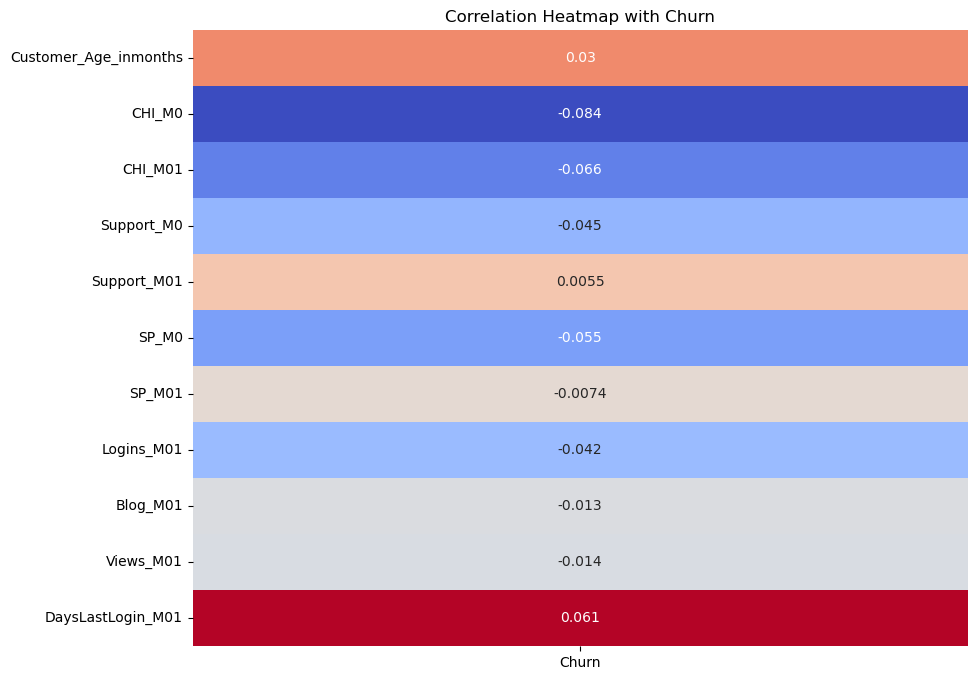

In [22]:
# 计算相关系数矩阵
df_copy = df.drop(['ID', 'Churn'], axis=1)

correlation_matrix = df.corr()
churn_correlation = correlation_matrix['Churn'].drop(labels=['ID','Churn'])

# 绘制相关性热力图
plt.figure(figsize=(10, 8))
sns.heatmap(churn_correlation.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation Heatmap with Churn')
plt.show()

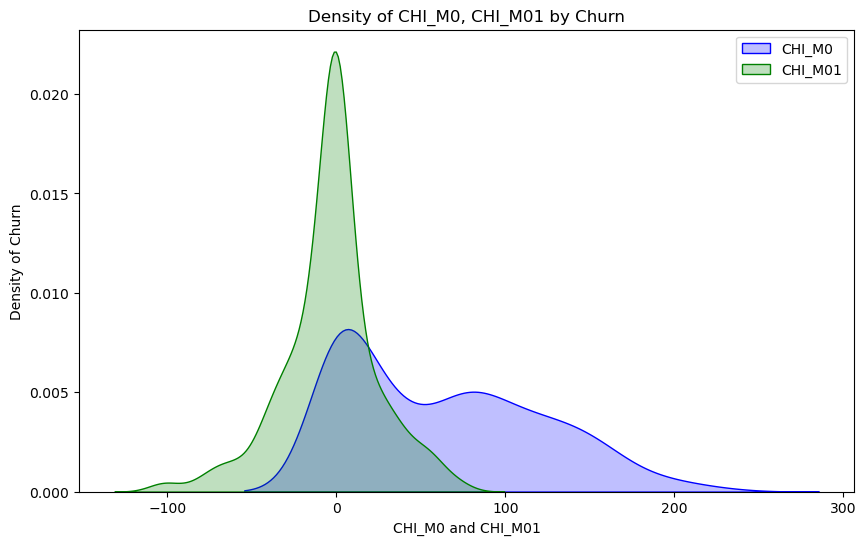

In [10]:
# 拆分为 churn 和未 churn 的子集
churn_data = df[df["Churn"] == 1]
unchurn_data = df[df["Churn"] == 0]

# 计算 CHI_M0 和 CHI_M01 的差值
diff = df.groupby("ID")["CHI_M0"].mean() - churn_data.groupby("ID")["CHI_M01"].mean()

# 绘制 CHI_M0 和 CHI_M01 的曲线
plt.figure(figsize=(10, 6))
sns.kdeplot(data=churn_data["CHI_M0"], color="blue", fill=True, label="CHI_M0")
sns.kdeplot(data=churn_data["CHI_M01"], color="green", fill=True, label="CHI_M01")


plt.xlabel("CHI_M0 and CHI_M01")
plt.ylabel("Density of Churn")
plt.title("Density of CHI_M0, CHI_M01 by Churn")

plt.legend()
plt.show()








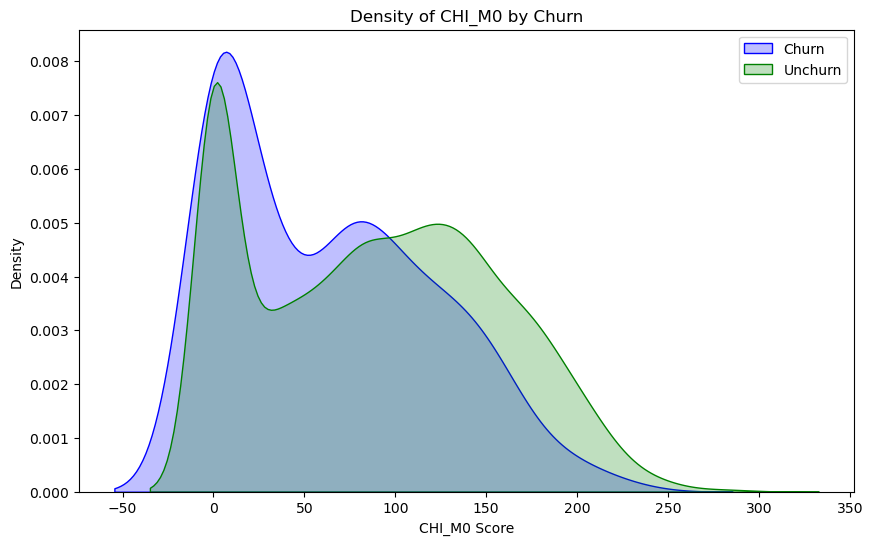

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=churn_data["CHI_M0"], color="blue", fill=True, label="Churn")
sns.kdeplot(data=unchurn_data["CHI_M0"], color="green", fill=True, label="Unchurn")

plt.xlabel("CHI_M0 Score")
plt.ylabel("Density")
plt.title("Density of CHI_M0 by Churn")

plt.legend()
plt.show()

In [19]:
df["CHI_diff"]= churn_data["CHI_M0"] - churn_data["CHI_M01"]
df["CHI_diff"].describe()

count    323.000000
mean      67.009288
std       57.333745
min        0.000000
25%       10.500000
50%       60.000000
75%      112.000000
max      205.000000
Name: CHI_diff, dtype: float64

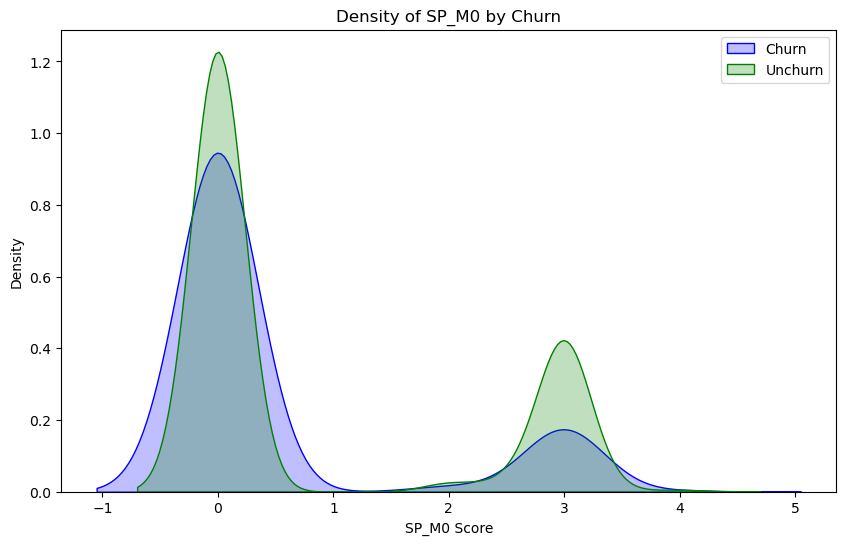

In [28]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=churn_data["SP_M0"], color="blue", fill=True, label="Churn")
sns.kdeplot(data=unchurn_data["SP_M0"], color="green", fill=True, label="Unchurn")

plt.xlabel("SP_M0 Score")
plt.ylabel("Density")
plt.title("Density of SP_M0 by Churn")

plt.legend()
plt.show()

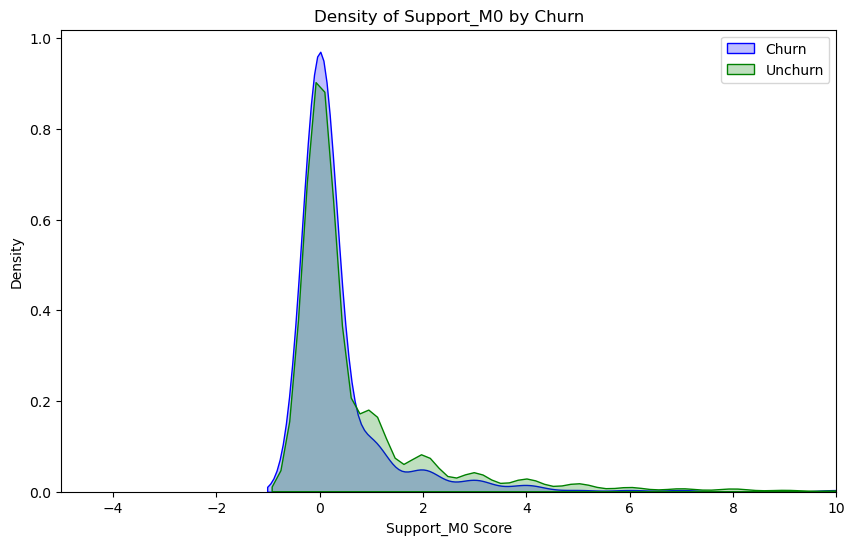

In [50]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=churn_data["Support_M0"], color="blue", fill=True, label="Churn")
sns.kdeplot(data=unchurn_data["Support_M0"], color="green", fill=True, label="Unchurn")

plt.xlabel("Support_M0 Score")
plt.ylabel("Density")
plt.xlim(-5, 10)
plt.title("Density of Support_M0 by Churn")

plt.legend()
plt.show()

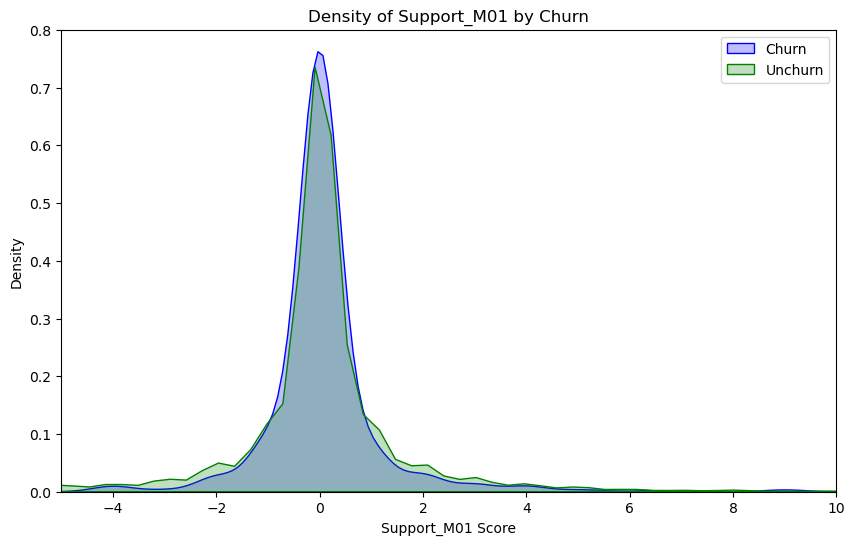

In [11]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=churn_data["Support_M01"], color="blue", fill=True, label="Churn")
sns.kdeplot(data=unchurn_data["Support_M01"], color="green", fill=True, label="Unchurn")

plt.xlabel("Support_M01 Score")
plt.ylabel("Density")
plt.xlim(-5, 10)
plt.title("Density of Support_M01 by Churn")

plt.legend()
plt.show()

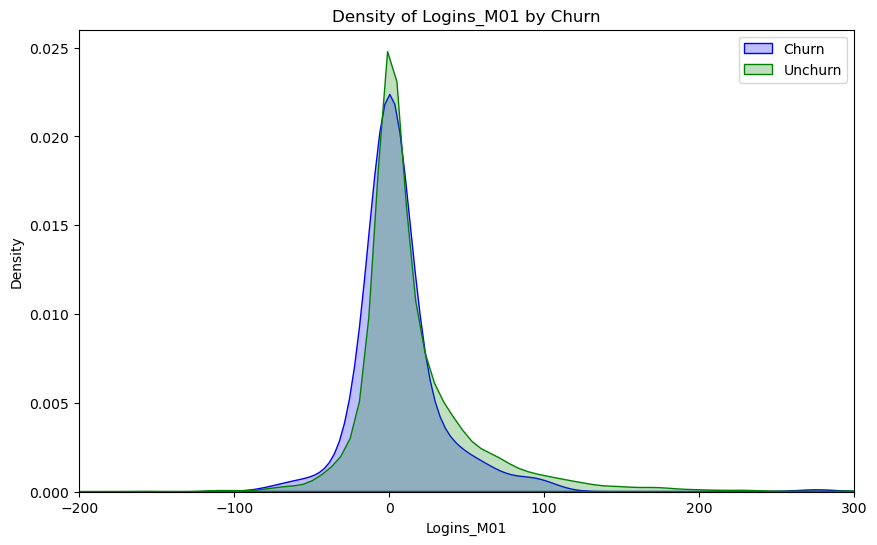

In [40]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=churn_data["Logins_M01"], color="blue", fill=True, label="Churn")
sns.kdeplot(data=unchurn_data["Logins_M01"], color="green", fill=True, label="Unchurn")

plt.xlabel("Logins_M01")
plt.ylabel("Density")
plt.xlim(-200,300)
plt.title("Density of Logins_M01 by Churn")

plt.legend()
plt.show()

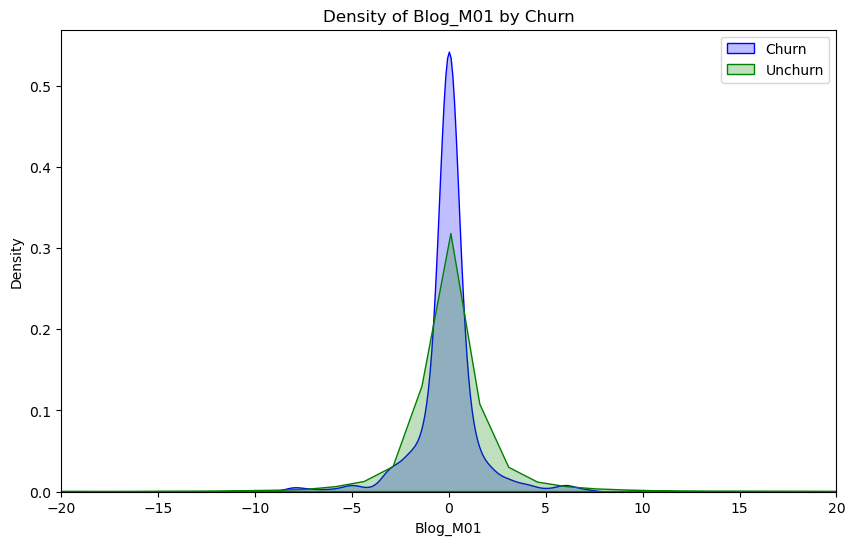

In [45]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=churn_data["Blog_M01"], color="blue", fill=True, label="Churn")
sns.kdeplot(data=unchurn_data["Blog_M01"], color="green", fill=True, label="Unchurn")

plt.xlabel("Blog_M01")
plt.xlim(-20,20)
plt.ylabel("Density")
plt.title("Density of Blog_M01 by Churn")

plt.legend()
plt.show()

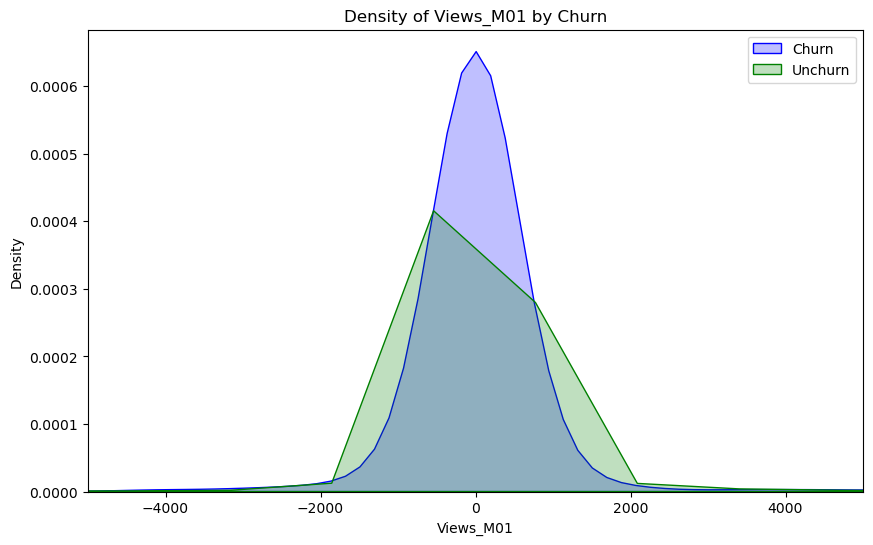

In [44]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=churn_data["Views_M01"], color="blue", fill=True, label="Churn")
sns.kdeplot(data=unchurn_data["Views_M01"], color="green", fill=True, label="Unchurn")

plt.xlabel("Views_M01")
plt.xlim(-5000, 5000)
plt.ylabel("Density")
plt.title("Density of Views_M01 by Churn")

plt.legend()
plt.show()

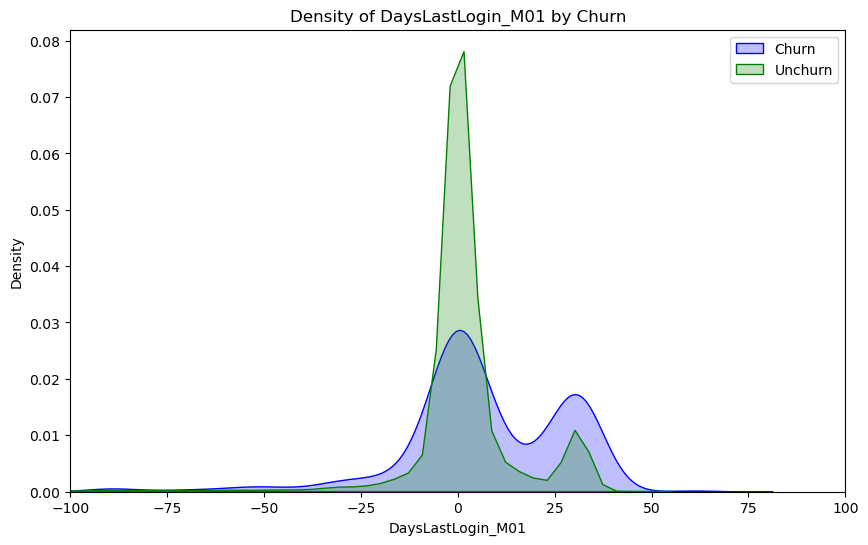

In [48]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=churn_data["DaysLastLogin_M01"], color="blue", fill=True, label="Churn")
sns.kdeplot(data=unchurn_data["DaysLastLogin_M01"], color="green", fill=True, label="Unchurn")

plt.xlabel("DaysLastLogin_M01")
plt.xlim(-100, 100)
plt.ylabel("Density")
plt.title("Density of DaysLastLogin_M01 by Churn")

plt.legend()
plt.show()

In [2]:
top50 = pd.read_excel("top_50_churn_customers1.xlsx")

In [3]:
top50.describe()

,Customer_Age_inmonths,CHI_M0,CHI_M01,Support_M0,Support_M01,SP_M0,SP_M01,Logins_M01,Blog_M01,Views_M01,DaysLastLogin_M01,age0-6,age6-14,age>14,Predicted Churn,Churn
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000
mean,0.189552,0.249866,0.394414,0.013125,0.483333,0.147500,0.482500,0.262211,0.253082,0.110832,0.917010,0.320000,0.320000,0.360000,1.0,0.920000
std,0.152992,0.236610,0.096725,0.034052,0.014677,0.298476,0.149425,0.028993,0.020375,0.008153,0.030327,0.471212,0.471212,0.484873,0.0,0.274048
min,0.014925,0.000000,0.201201,0.000000,0.450000,0.000000,0.125000,0.199482,0.133562,0.108528,0.755994,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.078358,0.008389,0.351351,0.000000,0.483333,0.000000,0.500000,0.252159,0.256849,0.109463,0.913963,0.000000,0.000000,0.000000,1.0,1.000000
50%,0.156716,0.204698,0.375375,0.000000,0.483333,0.000000,0.500000,0.253022,0.256849,0.109463,0.913963,0.000000,0.000000,0.000000,1.0,1.000000
75%,0.268657,0.425336,0.436186,0.000000,0.483333,0.000000,0.500000,0.267703,0.256849,0.109595,0.919252,1.000000,1.000000,1.000000,1.0,1.000000
max,0.686567,0.818792,0.753754,0.156250,0.566667,0.750000,0.875000,0.366149,0.273973,0.166927,0.957687,1.000000,1.000000,1.000000,1.0,1.000000


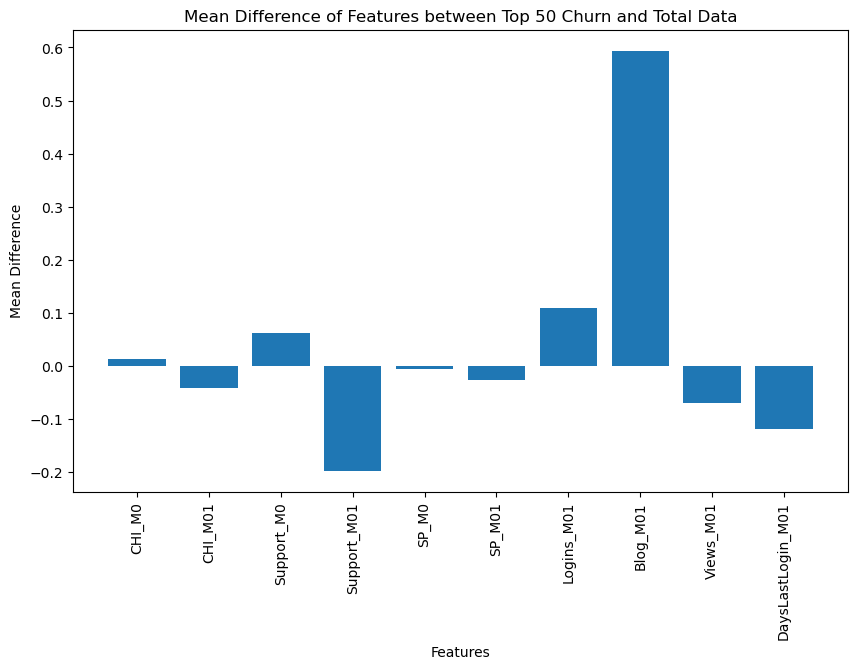

In [32]:
from sklearn.preprocessing import MinMaxScaler

# 读取总体数据的特征数据
total_data = pd.read_excel("QWE/QWE.xlsx")
total_data['age0-6'] = 0
total_data['age6-14'] = 0
total_data['age>14'] = 0

total_data.loc[total_data['Customer_Age_inmonths'] <= 6, 'age0-6'] = 1
total_data.loc[(total_data['Customer_Age_inmonths'] > 6) & (total_data['Customer_Age_inmonths'] <= 14), 'age6-14'] = 1
total_data.loc[total_data['Customer_Age_inmonths'] > 14, 'age>14'] = 1

# 提取特征和目标变量
total_data = total_data.drop(['Churn','ID', 'Customer_Age_inmonths', 'age0-6', 'age6-14', 'age>14'], axis=1)  # 特征

# 提取特征列
feature_names = total_data.columns  # 排除最后一列的 "Churn"

mm = MinMaxScaler()
total_data_scaled = mm.fit_transform(total_data)


# 读取最有可能 churn 的 50 个人的特征数据
top_50_churn_data = pd.read_excel("top_50_churn_customers1.xlsx")
top_50_churn_data = top_50_churn_data.drop(['Customer_Age_inmonths', 'age0-6', 'age6-14', 'age>14'], axis=1)  # 特征
top_50_churn_data_scaled = mm.fit_transform(top_50_churn_data)

# 计算总体数据和最有可能 churn 的 50 个人的特征均值差异
mean_diff = np.mean(top_50_churn_data_scaled[:,:-2], axis=0) - np.mean(total_data_scaled, axis=0)

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(feature_names, mean_diff)
plt.xlabel("Features")
plt.ylabel("Mean Difference")
plt.title("Mean Difference of Features between Top 50 Churn and Total Data")
plt.xticks(rotation=90)
plt.show()


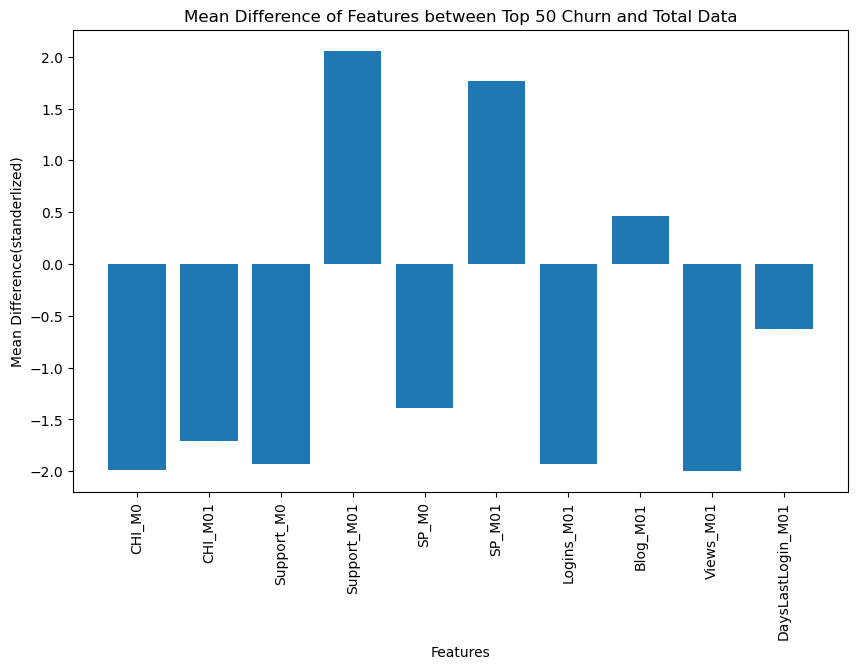

In [30]:
# 每一列的均值
total_data_mean = (top_50_churn_data.mean()[:-2] + total_data.mean()) / 2

mean_diff = (top_50_churn_data.mean()[:-2] - total_data.mean()) / total_data_mean

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(feature_names, mean_diff)
plt.xlabel("Features")
plt.ylabel("Mean Difference(Standardized)")
plt.title("Mean Difference of Features between Top 50 Churn and Total Data")
plt.xticks(rotation=90)
plt.show()

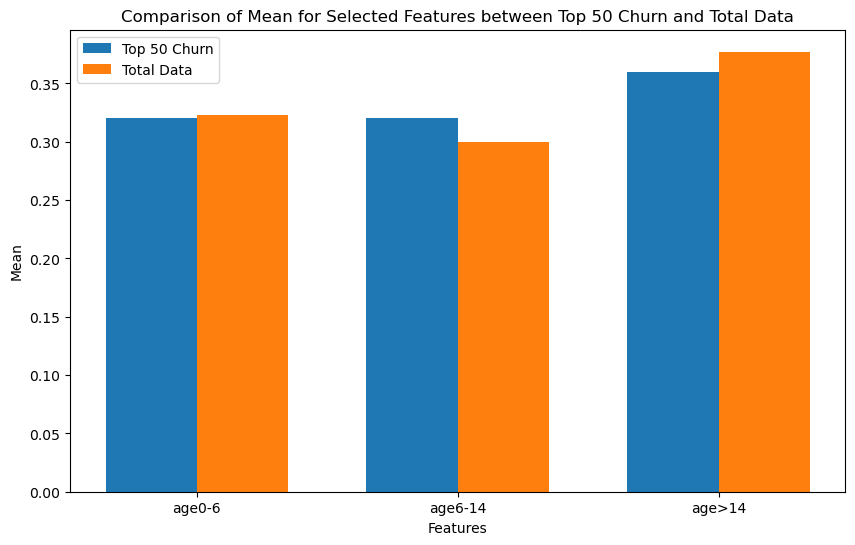

In [36]:
# 读取总体数据的特征数据
total_data = pd.read_excel("QWE/QWE.xlsx")
total_data['age0-6'] = 0
total_data['age6-14'] = 0
total_data['age>14'] = 0

total_data.loc[total_data['Customer_Age_inmonths'] <= 6, 'age0-6'] = 1
total_data.loc[(total_data['Customer_Age_inmonths'] > 6) & (total_data['Customer_Age_inmonths'] <= 14), 'age6-14'] = 1
total_data.loc[total_data['Customer_Age_inmonths'] > 14, 'age>14'] = 1

# 读取最有可能 churn 的 50 个人的特征数据
top_50_churn_data = pd.read_excel("top_50_churn_customers1.xlsx")

# 提取特定特征列
selected_features = ['age0-6', 'age6-14', 'age>14']

# 提取 Top 50 Churn 和总体数据中的特定特征列数据
top_50_churn_data_selected = top_50_churn_data[selected_features]
total_data_selected = total_data[selected_features]

# 计算特定特征在 Top 50 Churn 和总体数据中的均值
mean_top_50_churn = top_50_churn_data_selected.mean()
mean_total_data = total_data_selected.mean()

# 设置柱子的位置
x = np.arange(len(selected_features))

# 设置柱子的宽度
width = 0.35

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, mean_top_50_churn, width, label='Top 50 Churn')
plt.bar(x + width/2, mean_total_data, width, label='Total Data')
plt.xlabel("Features")
plt.ylabel("Mean")
plt.title("Comparison of Mean for Selected Features between Top 50 Churn and Total Data")
plt.xticks(x, selected_features)
plt.legend()
plt.show()

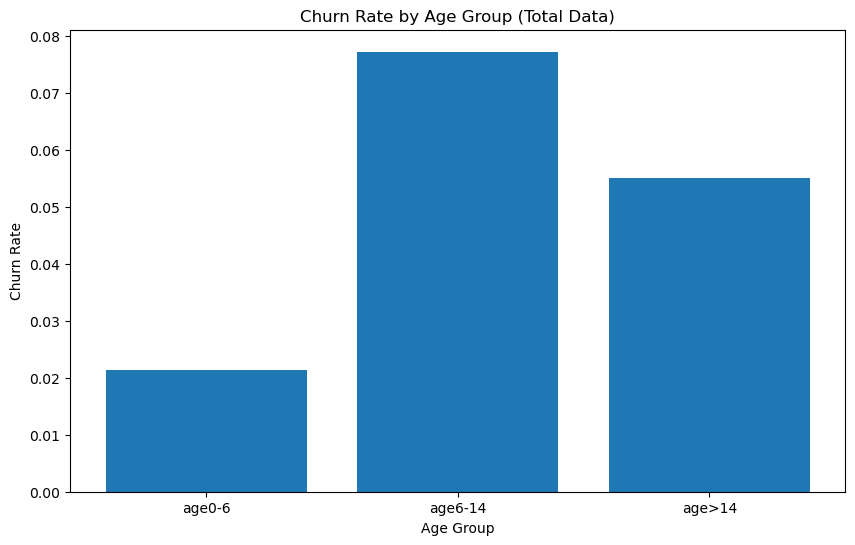

In [37]:
# 计算每个年龄段的 churn rate
churn_rates = []
for feature in selected_features:
    churn_rate = total_data[total_data[feature] == 1]['Churn'].mean()
    churn_rates.append(churn_rate)

# 创建数据框
data = pd.DataFrame({'Age Group': selected_features, 'Churn Rate': churn_rates})

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(data['Age Group'], data['Churn Rate'])
plt.xlabel("Age Group")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Age Group (Total Data)")
plt.show()

In [25]:
print(total_data.mean())

CHI_M0               87.316685
CHI_M01               5.058610
Support_M0            0.706318
Support_M01          -0.006932
SP_M0                 0.812781
SP_M01                0.030169
Logins_M01           15.727903
Blog_M01              0.157240
Views_M01            96.310540
DaysLastLogin_M01     1.764613
dtype: float64
